In [2]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
dataset = keras.datasets.fashion_mnist 
((train_images, train_labels),(test_images, test_labels)) = dataset.load_data()

Text(0.5, 1.0, '9')

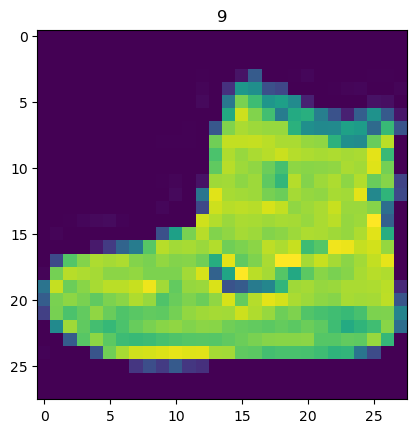

In [4]:
plt.imshow(train_images[0])
plt.title(train_labels[0])

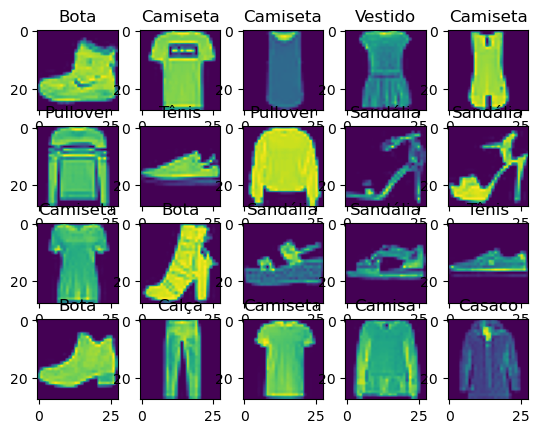

In [22]:
train_labels.min()
train_labels.max()
total_de_classes = 10

nomes = ['Camiseta','Calça','Pullover','Vestido','Casaco','Sandália','Camisa','Tênis','Bolsa','Bota']

for imagem in range(20):
    plt.subplot(4, 5, imagem+1)
    plt.imshow(train_images[imagem])
    plt.title(nomes[train_labels[imagem]])


In [25]:
train_images = train_images/255

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #camada de entrada, transformando um array de duas dimensões em apenas uma
    keras.layers.Dense(256, activation='relu'), #camada oculta, todos os nodos conectados com os outros, camada de processamento dos dados -> relu todos os numeros negativos viram 0
    keras.layers.Dense(128, activation='relu'),#camada oculta, mais camadas e neuronios, mais lento o procesasmento e não necessariamente menos perda
    keras.layers.Dense(10, activation='softmax')
])

In [26]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3028
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028
